<a href="https://colab.research.google.com/github/nirmalaraj77/AI-Fundamentals/blob/main/Supervised_Learning_with_skikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning**
* Machine learning is the process whereby computers learn to make decisions from data,

* Without being explicitly programmed.

* For example, learning to predict whether an email is spam or not spam given its content and sender.

* Or learning to cluster books into different categories based on the words they contain, then assigning any new book to one of the existing clusters.


#**Unsupervised Learning**
* Uncovering hidden patters from unlabeled data.

* Example, grouping customers into distinct categories (clustering) without knowing in advance what these catgories are.


#**Supervised Learning**
* The predicted values are known.

* Aim:Predict the target value of unseen data,given the features.

* Uses labels.

#**Types of Supervised Learning**

* Classification: Target variable consists of categories (e.g. binary classification)

* Regression: Target variable is continous (predict price based on bedrooms and size)

#**Naming Conventions**
* Feature = predictor variable = independent variable

* target variable = dependent variable = response variable

#**Before using Supervised Learning**

* No missing values
* Data in numeric format
* Data stored in pandas DataFrame or NumPy array
* Perform EDA first



#**scikit-learn syntax**

* Import a Model from an sklearn module.
* Example, the k-Nearest Neighbors model uses distance between observations to predict labels or values.
* from sklearn module import model

* Create variable name model and Instantiate Model
* model = Model()

* Fit model to data where it learns patterns about the features and the target variable.
* Fit the model to X, an array of features, and y, an array of target variable values.
model.fit (X, y)

* Use the model's dot-predict method, passing six new observations, X_new.
* For example, if feeding features from six emails to a spam classification model, an array of six values is returned.
* A one indicates the model predicts that email is spam, and a zero represents a prediction of not spam.
* predictions = model.predict(X_new)

#**Build classification model, or classifier, to predict labels of unseen data**

##**There are four steps**

1. First, we build a classifier (model)

2. Model learns from the labeled data we pass to it.

3. We then pass it unlabeled data as input

4. Model predicts labels for this unseen data.

* As the classifier learns from the labeled data, we call this the training data.

##**k-Nearest Neighbours (KNN)**

* Predict the label of a data point by

  * Looking at the k closest data points.
  * Taking a majority vote

* KNN creates a decision boundary

##**Requirements**
* scikit-learn requires that the features are in an array where each column is a feature and each row a different observation.

* Similarly, the target needs to be a single column with the same number of observations as the feature data.








In [1]:
# Import libraries and datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


advertising = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/advertising_and_sales_clean.csv')
diabetes = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/diabetes_clean.csv')
music = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/music_clean.csv')
telecom = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/telecom_churn_clean.csv')


In [2]:
# Using scikit-learn to fit a classifier

## Import KNN
from sklearn.neighbors import KNeighborsClassifier

## Split data into X (2D array of features day_charge, eve-Charge)
X = telecom[['total_day_charge', 'total_eve_charge']].values

## and split data into y (1D array of target values - churn)
y = telecom[['churn']].values

## Check shapes of X and y - there are 3333 observations of 2 features, and 3333 observations of the target variable.
print(X.shape, y.shape)

(3333, 2) (3333, 1)


In [3]:
## Instantiate KNeighboursClassifier - setting n_neighbours to 15
knn = KNeighborsClassifier(n_neighbors=15)

## Fit model to data
knn.fit(X, y)

## Create set of nerw observations X_new
X_new = np.array([[56.8, 17.5],
                 [24.4, 24.1],
                  [50.1, 10.9]])

## Check shape of X_new - there are 3 observations of 2 features
print (X_new.shape)

(3, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [4]:
##  Use the classifier's .predict method and pass it the unseen data as a 2D NumPy array
predictions = knn.predict(X_new)

## Print the predictions for the new data
print("Predictions: {}".format(predictions))

## Returns a binary value for each observation or row in X_new.
## It predicts 1, which corresponds to 'churn', for the first observation,
## and 0, which corresponds to 'no churn', for the second and third observations.

Predictions: [1 0 0]


#**Measuring Model Performance**

* In classification, accuracy is a commonly-used metric.
* Number of correct predictions / total number of observations.

##**Computing accuracy**

* It is common to split data into a training set and a test set.

* We fit the classifier using the training set,

* then we calculate the model's accuracy against the test set's labels.

##**Train / test split**
* Import train_test_split from sklearn.model_selection.

* We call train_test_split, passing our features and targets.

* We commonly use 20-30% of our data as the test set - by setting the test_size argument to 0.2 - 0.3

* Random_state argument sets a seed - allows us to reproduce the exact split

* **It is best practice to ensure our split reflects the proportion of labels in our data.**

* So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn.

* We achieve this by setting stratify equal to y.

* train_test_split returns four arrays: the training data, the test data, the training labels, and the test labels.

* We unpack these into X_train, X_test, y_train, and y_test, respectively.

* We then instantiate a KNN model and fit it to the training data using the dot-fit method.

* To check the accuracy, we use the dot.score method, passing X test and y test.

* The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

In [5]:
# Train/test split

## Import train/test split
from sklearn.model_selection import train_test_split

## Split data into X (2D array of features) and y (1D array of target values)
X = telecom[['total_day_charge', 'total_eve_charge']].values
y = telecom[['churn']].values

## Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

## Instantiate knn model and fit to training data
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

## Score model on test data
print(knn.score(X_test, y_test))

0.872


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#**Model complexity**
* Let's discuss how to interpret k.

* Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation.

* E.g. as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model.

* **Simpler models are less able to detect relationships in the dataset, which is known as underfitting**.

* **In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.**

#**Model complexity and over/underfitting**
* We can also interpret k using a model complexity curve.

* With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results.

* We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values.

* We use a for loop to repeat our previous workflow, building several models using a different number of neighbors.

* We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data.

* We then calculate training and test set accuracy, storing the results in their respective dictionaries.

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

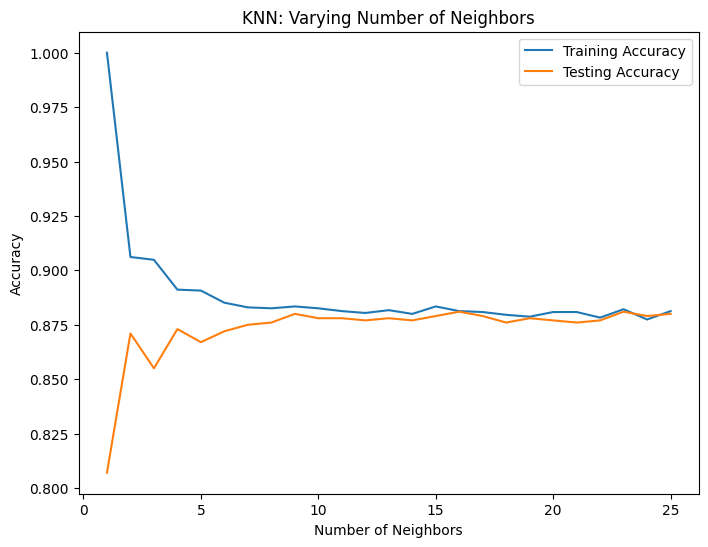

In [6]:
# Model complexity and over/under fitting
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

# Plot results
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## As k increases beyond 15 we see underfitting where performance plateaus on both test and training sets, as indicated in this plot.

## The peak test accuracy actually occurs at around 13 neighbors.